In [92]:
# Packages for Data Manipulation
import numpy as np
import pandas as pd
import os
from collections import Counter
import spacy

# for NLP
import re
import unicodedata
from bs4 import BeautifulSoup

# Packages for Graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for ML
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# to see all the cells and data in the dataframes
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth', 300) 

# to hide warnings about train/test size for train_test_split
import warnings
warnings.filterwarnings('ignore')

## Merging the three datasets

In [93]:
# csv to df
path = os.path.abspath('politifact_balanced_data.csv')
df_political = pd.read_csv(path, index_col=0)

# specify rows of importance
df_political = df_political[["veracity", "statement"]]

# See sample of data
df_political.head(5)

,veracity,statement
3,0,"""Tim Kaine doesn’t want a border at all. He wants to get rid of Immigration and Customs Enforcement and basically the border patrol as well."""
5,0,"""The deficit ... is coming down, and it’s coming down rapidly."""
20,1,"""Migrant mother and ‘crying girl’ on Time cover never separated."""
23,0,"""Fact: Over 90,000 kids were detained under Obama. And no one cared."""
24,0,"""$1 billion—that’s how much Bruce Rauner has wasted with his budget crisis."""


In [94]:
path = os.path.abspath(r'C:\Users\catat\OneDrive\Desktop\DataForBachelorThesis\Real-lifeDeceptionDetection2016\Transcription\Truthful\transcripts.csv')
df_small = pd.read_csv(path, index_col=0)

# specify rows of importance
df_small = df_small[["veracity", "statement"]]

# See sample of data
df_small.head(5)

,veracity,statement
0,0,No sir I did not. I absolutely did not. No sir I was not. No sir.
1,0,"... and she approached me, and at that time that she had tripped over the rug and kind of bumped into me I was heading to the nursery, which is ammm ... I know you guys have all seen the layout, there's ahhh ... was a loveseat right there and a rocking chair right next to each other, and there's..."
2,0,"No sir I was not, not at all."
3,0,"He had told me that he had had a dream that, ammm ...he was in a forest and that he had killed Laura, and that if I didn't help him get rid of her, that he â€¦ that I was gonna be next."
4,0,"And he told me that, ammm â€¦ he was trying to figure some stuff out, and ammm â€¦ I asked him Like what? and he will â€¦ I mean I will never forget it, he was smoking a cigarette, and he was like really calm, and he looked at me and he said What would you say if I said â€¦ if I told you Laura w..."


In [95]:
path = os.path.abspath('sevenDataset_cleaned.csv')
df_7t = pd.read_csv(path, index_col=0)

# specify rows of importance
df_7t = df_7t[["veracity", "statement"]]

# See sample of data
df_7t.head(5)

,veracity,statement
0,0,There is a great deal of truth to the anti-vax movement.
1,0,Jenny mccarthy is a learned doctor who deserves our respect.
2,0,Driving doesn\t really require any practice.
3,0,Drinking and driving is a winning and safe combination.
4,0,Good hygiene isn\t really important or attractive.


In [6]:
df_united = pd.concat([df_political,df_small])
df_united = pd.concat([df_united, df_7t])

In [7]:
df_united.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6231 entries, 3 to 3944
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   veracity   6231 non-null   int64 
 1   statement  6231 non-null   object
dtypes: int64(1), object(1)
memory usage: 146.0+ KB


## Split the dataframe into train, validation and test¶

In [8]:
train=df_united.sample(frac=0.7,random_state=200) #random state is a seed value
df_test = df_united.drop(train.index)
validation=df_validation.sample(frac=0.6,random_state=200)
test = df_validation.drop(validation.index)

In [9]:
train.info()
validation.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4362 entries, 1134 to 2335
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   veracity   4362 non-null   int64 
 1   statement  4362 non-null   object
dtypes: int64(1), object(1)
memory usage: 102.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 877 entries, 1626 to 790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   veracity   877 non-null    int64 
 1   statement  877 non-null    object
dtypes: int64(1), object(1)
memory usage: 20.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 155 to 3928
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   veracity   542 non-null    int64 
 1   statement  542 non-null    object
dtypes: int64(1), object(1)
memory usage: 12.7+ KB


## Test to see that the datasets are  well balanced

In [10]:
train_avg_l = train['statement'].apply(len).mean()
valid_avg_l = validation['statement'].apply(len).mean()
test_avg_l = test['statement'].apply(len).mean()

In [11]:
#compute the average lenght from each dataset to ensure the random distribution of the data
print(train_avg_l)
print(valid_avg_l)
print(test_avg_l)

68.0
64.74800456100343
60.72509225092251


In [10]:
import en_core_web_sm

nlp = en_core_web_sm.load()

def strip_html_tags(text):
            soup = BeautifulSoup(text, "html.parser")
            [s.extract() for s in soup(["iframe", "script"])]
            stripped_text = soup.get_text()
            stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
            return stripped_text
        
def remove_accented_characters(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [8]:
# lemmatization function
def normalize(text, 
              remove_html = False, 
              lowercase = False,
              lemmatize = False,
              remove_extra_newlines = False,
              remove_stopwords = False,
              remove_non_alphabetic = False,
              remove_accented_char = False,
              ):
        
    # remove html
    if remove_html:
        text = strip_html_tags(text)

    # lowercase all text
    if lowercase:
        text = text.lower()
        
    # lemmatize
    if lemmatize:        
        text = nlp(text)
        text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
        
    # remove extra new lines    
    if remove_extra_newlines:
        text = re.sub(r'[\r|\n|\r\n]+', ' ', text)
    
    # remove stopwords
    if remove_stopwords:
        stopwords = spacy.lang.en.stop_words.STOP_WORDS
        text = nlp(text)
        text = ' '.join([token.text for token in text if token.text not in stopwords])
    
    # remove non-alphabetic characters
    if remove_non_alphabetic:
        text = nlp(text)
        text = ' '.join([token.text for token in text if token.text.isalpha()])
        
    # remove accented characters
    if remove_accented_char:
        text = remove_accented_characters(text)

    return text

In [23]:
train["light_normalization"] = train.statement.apply(lambda x : normalize(x, 
                                                                  remove_html = True, 
                                                                  lowercase = True,
                                                                  remove_extra_newlines = True,
                                                                  remove_accented_char = True))

## Prepare the logistic regression model

In [12]:
class Binary_Classification:
    def __init__(self, 
                 x = None, 
                 y = None, 
                 scoring = None, 
                 test_size = 0.3, 
                 n_folds = 3, 
                 standardize = False,
                 nlp = False,
                 vectorizer = None): 
        
        self.x = x # features as df
        self.y = y # target as df
        self.scoring = scoring # example: "accuracy", "f1", "roc_auc"
        self.test_size = test_size # set to .3 by default
        self.n_folds = n_folds # set to 5 by default
        self.standardize = standardize
        self.x_train, self.x_test, self.y_train, self.y_test = \
        train_test_split(self.x, 
                         self.y, 
                         test_size = self.test_size, 
                         random_state = 0)
        if nlp:
            self.x_train = vectorizer.fit_transform(self.x_train)
            self.x_test = vectorizer.transform(self.x_test)
    
    """ 
    .examine_model attribute has two functions within it:
    (1) model_and_grid => using a model's name, it returns the model with cvgrid
    (2) best_model => using model_and_grid, finds best hyperparameters for model
    """
    
    def examine_model(self, model_name):
        
        def model_and_grid(model_name):
            if model_name == "log_reg":
                model = LogisticRegression()
                grid = {'C' : [0.001, 0.1, 1, 10, 100]}
                return model, grid

            elif model_name == "knn":
                model = KNeighborsClassifier()
                grid = {"n_neighbors" : [3,6,9,12]}
                return model, grid
            
            elif model_name == "gnb":
                model = GaussianNB()
                grid = {"var_smoothing" : [1e-01, 1e-05, 1e-09, 1e-15]}
                return model, grid
            
            elif model_name == "mnb":
                model = MultinomialNB()
                grid = {"alpha" : [.1, 1, 5, 10, 50]}
                return model, grid
            
            elif model_name == "ran_for":
                model = RandomForestClassifier(random_state=0)
                grid = {'n_estimators' : [1, 30], 
                        'max_features' : ['auto', 'log2'],  
                        'max_depth' : [ 3, 5, 7, 10, 12, 15], 
                        'criterion' : ['gini', 'entropy']}
                return model, grid

            elif model_name == "xgb":
                model = XGBClassifier()
                grid = { 
                          "max_depth"         : [2, 4, 8, 16],
                          "alpha"             : [10, 20, 30],
                          "lambda"            : [10, 20, 30],
        #                  "min_child_weight" : [  1,  5],
        #                  "colsample_bytree" : [ .3, .7],
        #                  "learning_rate"    : [.10, .30],
        #                  "gamma"            : [  0, .5, 5],
        #                  "eta"              : [0.05, 0.20]
                }  
                return model, grid
        
        def best_model(model, grid):
            gs = GridSearchCV(model, param_grid=grid, cv=self.n_folds, scoring=self.scoring)
            gs.fit(self.x_train, self.y_train.iloc[:,0])
            print("CV " + self.scoring.upper() + " SCORE:", round(gs.best_score_, 2))
            print("CV PARAMS: ", gs.best_params_)
            #print("BEST MODEL: ", gs.best_estimator_)
            best_model = gs.best_estimator_
            return best_model

        model, grid = model_and_grid(model_name)
        best_mod = best_model(model, grid)
        return best_mod

    """ 
    .compare attribute uses examine_model to compare all models
    """
    
    def compare(self):
        z = 0
        mods = ["log_reg", 
                #"knn", 
                #"gnb", 
                "mnb", 
                "ran_for",
                #"xgb"
               ]
        for name in mods:
            print("*** " + mods[z] + " ***")
            self.examine_model(name)
            print("")
            z += 1
    
    """ 
    .test_scores attribute uses examine_model to report various metrics on training & test data
    """
    
    def test_scores(self, 
                    model_name = None, 
                    verbose_results = False, 
                    all_metrics = True): 
        model = self.examine_model(model_name)
        y_pred_train = model.predict(self.x_train)
        y_pred_test = model.predict(self.x_test)
        y_prob_train = model.predict_proba(self.x_train)[:,1]
        y_prob_test = model.predict_proba(self.x_test)[:,1]
        
        print()
        """ Accuracy """
        ## number of correct predictions made / total number of predictions made
        ### accuracy is not a good metric for imbalanced data
        if self.scoring == "accuracy" or all_metrics:
            accuracy_training = model.score(self.x_train, self.y_train)
            tru_count_train = Counter(self.y_train.iloc[:,0])[True]
            fal_count_train = Counter(self.y_train.iloc[:,0])[False]

            # test baseline
#             print("chance of true in training (baseline): ", 
#                   round(tru_count_train/(tru_count_train + fal_count_train),2))
#             print("chance of false in training (baseline): ", 
#                   round(fal_count_train/(tru_count_train + fal_count_train),2))
            
#             print("Accuracy on training data: {:0.2f}".format(accuracy_training))
#             print()

            accuracy_test = model.score(self.x_test, self.y_test)
            tru_count_test = Counter(self.y_test.iloc[:,0])[True]
            fal_count_test = Counter(self.y_test.iloc[:,0])[False]

            # test baseline
#                 print("chance of true in test (baseline): ", 
#                       round(tru_count_test/(tru_count_test + fal_count_test),2))
#                 print("chance of false in test (baseline): ", 
#                       round(fal_count_test/(tru_count_test + fal_count_test),2))

            print("Accuracy on test data: {:0.2f}".format(accuracy_test))
            print()

        """ ROC AUC """
        ## How well model distinguishs between classes
        ### Higher the AUC, better the model is at predicting 0 as 0 and 1 as 1
        #### https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
        if self.scoring == "roc_auc" or all_metrics:
            roc_auc_score_training = roc_auc_score(self.y_train.iloc[:,0], y_prob_train)
#             print("ROC AUC on training data:{:0.2f}".format(roc_auc_score_training))

            roc_auc_score_test = roc_auc_score(self.y_test.iloc[:,0], y_prob_test)
            print("ROC AUC on test data: {:0.2f}\n".format(roc_auc_score_test))
                
        """ F1 (f-one) Score """
        ## F1 Score = 2*((precision*recall)/(precision+recall))
        if self.scoring == "f1" or all_metrics:
            f1_train = metrics.f1_score(self.y_train.iloc[:,0], y_pred_train)
#             print("F1 on training data:{:0.2f}".format(f1_train))

            f1_test = metrics.f1_score(self.y_test.iloc[:,0], y_pred_test)
            print("F1 on test data: {:0.2f}".format(f1_test))
            print()

        """ Classification Report """
        ## Precision = TP / TP + FP
        ## Recall = TP/ TP + FN
        class_repo = classification_report(self.y_test,y_pred_test)
        print("Classification Report on test data:\n", class_repo)
            
        """ Confusion matrix """
        def print_confusion_matrix(confusion_matrix, 
                           class_names,
                           #figsize = (2,2), fontsize=20
                          ):
    
            """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
            2 benefits: (1) mieruka (i.e., visual control) and 
            (2) colors change depending on values (larger values generate darker colors)
            
            if you're wondering what mieruka is: 
            https://harishsnotebook.wordpress.com/2016/05/05/visibilization-crime-fighting-magic-and-mieruka/

            Arguments
            ---------
            confusion_matrix: numpy.ndarray
                The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
                Similarly constructed ndarrays can also be used.
            class_names: list
                An ordered list of class names, in the order they index the given confusion matrix.
            figsize: tuple
                A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
                the second determining the vertical size. Defaults to (10,7).
            fontsize: int
                Font size for axes labels. Defaults to 14.

            Returns
            -------
            matplotlib.figure.Figure
                The resulting confusion matrix figure
            """

            df_cm = pd.DataFrame(
                confusion_matrix, 
                index=class_names, 
                columns=class_names, 
            )

            fig = plt.figure(#figsize=figsize
            )

            try:
                heatmap = sns.heatmap(df_cm, 
                                      annot=True, 
                                      fmt="d", 
                                      cbar=False, 
                                      cmap="YlGnBu")
            except ValueError:
                raise ValueError("Confusion matrix values must be integers.")

                heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), 
                                             rotation=0, 
                                             ha='right', 
                                             #fontsize=fontsize
                                            )

                heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), 
                                             rotation=45, 
                                             ha='right', 
                                             #fontsize=fontsize
                                            )

            plt.title('Test Confusion Matrix')
            plt.ylabel('Correct label')
            plt.xlabel('Predicted label')
            
        c_matrix = confusion_matrix(self.y_test, y_pred_test)
        print_confusion_matrix(c_matrix, [False, True])
        
        if verbose_results:
            #Plot ROC curve
            fpr, tpr, thresholds = roc_curve(self.y_test, y_prob_test)
            plt.plot([0, 1], [0, 1], 'k--')
            plt.plot(fpr, tpr)
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            plt.show()
            print("")    
                
            # Threshold Plot
            precision, recall, thresholds = precision_recall_curve(self.y_test, y_prob_test)
            f1 = []
            acc = []
            roc = []
            avg_pr = []

            def adjust_pred_prob(y_prob_test, new_threshold):
                return [1 if prob >= new_threshold else 0 for prob in y_prob_test]

            for t in thresholds:
                adjusted_y_pred = adjust_pred_prob(y_prob_test, t)
                add_f1 = metrics.f1_score(self.y_test, adjusted_y_pred)
                f1.append(add_f1)
                
            for t in thresholds:
                adjusted_y_pred = adjust_pred_prob(y_prob_test, t)
                add_acc = accuracy_score(self.y_test, adjusted_y_pred)
                acc.append(add_acc)
                
            for t in thresholds:
                adjusted_y_pred = adjust_pred_prob(y_prob_test, t)
                add_avg_pr = average_precision_score(self.y_test, adjusted_y_pred)
                avg_pr.append(add_avg_pr)
                
#             ## Retrieve probability of being 1(in second column of probs_y)
#             pr_auc = metrics.auc(recall, precision)

            plt.title("Precision-Recall-Accuracy vs Threshold")
            plt.plot(thresholds, precision[: -1], "b-", label="Precision")
            plt.plot(thresholds, recall[: -1], "r-", label="Recall")
            #plt.plot(thresholds, avg_pr, "k-", label="Average Precision Recall")
            #plt.plot(thresholds, f1, "k-", label="F1_Score")
            plt.plot(thresholds, acc, "g-", label="Accuracy")
            
            max_acc_x = thresholds[np.argmax(acc)]
            plt.axvline(x=max_acc_x, ymin=0.00, ymax=max(acc), color='g', linestyle='-')
            #plt.axhline(y=max(acc), color='g', linestyle='--')
            #plt.text(max_acc_x, max(acc), ("Max Accuracy " + str(round(max_acc_x,2))), rotation=90)
            
            #max_f1_x = thresholds[np.argmax(f1)]
            #plt.axvline(x=max_f1_x, color='k', linestyle='--')
            #plt.axhline(y=max(f1), color='k', linestyle='--')
            #plt.text(max_f1_x, max(f1), ("Max F1 Score " + str(round(max_f1_x,2))), rotation=90)
                        
            plt.ylabel("Score")
            plt.xlabel("Threshold")
            
            #plt.text(intersect_x, intersect_y, 'PR Intersect', rotation=90)
            plt.legend(loc="lower left")
            plt.ylim([0,1])
            plt.show()
            print("Maximum Accuracy: " + str(round(max(acc),2)) + " @ Threshold: " + str(round(max_acc_x,2)))
            #print("Maximum F1 Score: " + str(round(max(f1),2)) + " @ Threshold: " + str(round(max_f1_x,2)))
            
            """ 
            Varying Fscore's beta vs Varying Thresholds
            
            The beta parameter determines the weight of recall in the combined score. 
            beta < 1 lends more weight to precision, while 
            beta > 1 favors recall 
            (beta -> 0 considers only precision, beta -> inf only recall).
            """

            f025 = []
            f050 = []
            f075 = []
            f100 = []
            f125 = []
            f150 = []
            f200 = []

            def fbeta_testing(beta, fxxx):
                for t in thresholds:
                    adjusted_y_pred = adjust_pred_prob(y_prob_test, t)
                    add_fbeta = metrics.fbeta_score(self.y_test, adjusted_y_pred, beta)
                    fxxx.append(add_fbeta)

            betas = [0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 2.00]
            flist = [f025, f050, f075, f100, f125, f150, f200]

            z = 0
            for beta in betas:
                fbeta_testing(beta, flist[z])
                z += 1

            plt.title("F_Beta_Score vs Threshold: Varying Betas")
            #plt.plot(thresholds, f025, "r-", label="F0.25")
            plt.plot(thresholds, f050, "m-", label="F0.50")
            #plt.plot(thresholds, f075, "g-", label="F0.75")
            plt.plot(thresholds, f100, "c-", label="F1.00")
            #plt.plot(thresholds, f125, "b-", label="F1.25")
            #plt.plot(thresholds, f150, "k-", label="F1.50")
            plt.plot(thresholds, f200, "y-", label="F2.00")
            #plt.axvline(.425, color='k', linestyle='--')
            #plt.axvline(.45, color='k', linestyle='-')
            
            max_f050_x = thresholds[np.argmax(f050)]
            plt.axvline(x=max_f050_x, ymin=0.00, ymax=max(f050), color='m', linestyle='-')
            max_f100_x = thresholds[np.argmax(f100)]
            plt.axvline(x=max_f100_x,ymin=0.00, ymax=max(f100), color='c', linestyle='-')
            max_f200_x = thresholds[np.argmax(f200)]
            plt.axvline(x=max_f200_x, ymin=0.00, ymax=max(f200), color='y', linestyle='-')
            
            plt.ylabel("F_Beta_Score")
            plt.xlabel("Threshold")
            plt.legend(loc="lower left")
            plt.ylim([0,1])
            plt.show()
            
            print("Maximum F0.5 Score: " + str(round(max(f050),2)) + " @ Threshold: " + str(round(max_f050_x,2)))
            print("Maximum F1   Score: " + str(round(max(f100),2)) + " @ Threshold: " + str(round(max_f100_x,2)))
            print("Maximum F2.0 Score: " + str(round(max(f200),2)) + " @ Threshold: " + str(round(max_f200_x,2)))

            """ Threshold = 0.5, varying fscore's beta """

            betas = [0.25,0.50,0.75,1.00,1.25,1.50,2.00]
            fbetas = []

            for beta in betas:
                score = fbeta_score(self.y_test, y_pred_test, beta=beta)
                fbetas.append(score)
        
    def feature_importance(self, model_name): 
        model = self.examine_model(model_name)
        fitted = model.fit(self.x_train, self.y_train.iloc[:,0])
        
        importances = fitted.feature_importances_
        indices = np.argsort(importances)
        features = self.x_train.columns
        plt.title('Feature Importances')
        plt.barh(range(len(indices)), importances[indices], color='grey', align='center')
        plt.yticks(range(len(indices)), [features[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.ylabel('Features')
        plt.show()
    
    """ 
    .permutation_importance attribute uses examine_model to report features in order of importance
    """
    def permutation_importance(self, model_name): 
        # https://www.kaggle.com/dansbecker/permutation-importance
        model = self.examine_model(model_name)
        fitted = model.fit(self.x_train, self.y_train.iloc[:,0])
        
        perm = PermutationImportance(fitted, random_state=0).fit(self.x_test, self.y_test.iloc[:,0])
        return eli5.show_weights(perm, feature_names = self.x_test.columns.tolist())
    
    def shap_summary_plot(self, model_name): 
        """Calculating SHAP values can be slow"""
        # https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values
        
        model = self.examine_model(model_name)
        fitted = model.fit(self.x_train, self.y_train.iloc[:,0])
        
        if model_name == "ran_for":
            explainer = shap.TreeExplainer(fitted)
            shap_values = explainer.shap_values(self.x_test)
            # we index in ([1]) to get the SHAP values for the prediction of "True"
            return shap.summary_plot(shap_values[1], self.x_test)
        
        else:     
            """ KernelExplainer cannot handle boolean values, they must be converted to int """
            x_train_summary = shap.kmeans(self.x_train, 3)
            explainer = shap.KernelExplainer(fitted.predict, x_train_summary)
            shap_values = explainer.shap_values(self.x_test)
            return shap.summary_plot(shap_values, self.x_test)
    
    def coefficients(self, model_name):
        model = self.examine_model(model_name)
        try:
            # Coefficients
            coefs = pd.Series(model.coef_[0], index = self.x.columns)
            coefs = coefs.sort_values()
            coefs.plot(kind="bar",title=(model_name.capitalize() + " Coefficients"))
            plt.show()
        except: 
            print()

In [13]:
# For Aesthetics
font = {'size' : 24}
mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = (3.0, 2.0) ### (→ , ↑) ###

In [24]:
models = Binary_Classification(x = train.light_normalization, 
                               y = train[["veracity"]], 
                               scoring = "accuracy", 
                               test_size = 0.3, 
                               n_folds = 3, 
                               standardize = False,
                               nlp = True,
                               vectorizer = CountVectorizer(lowercase = False))
                     
models.compare()

*** log_reg ***
CV ACCURACY SCORE: 0.57
CV PARAMS:  {'C': 0.1}

*** mnb ***
CV ACCURACY SCORE: 0.57
CV PARAMS:  {'alpha': 5}

*** ran_for ***
CV ACCURACY SCORE: 0.55
CV PARAMS:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 30}



CV ACCURACY SCORE: 0.57
CV PARAMS:  {'C': 0.1}

Accuracy on test data: 0.57

Classification Report on test data:
               precision    recall  f1-score   support

           0       0.55      0.57      0.56       627
           1       0.59      0.57      0.58       682

    accuracy                           0.57      1309
   macro avg       0.57      0.57      0.57      1309
weighted avg       0.57      0.57      0.57      1309



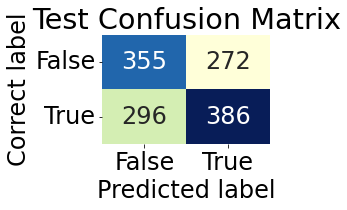

In [25]:
models.test_scores(model_name = "log_reg", 
                   verbose_results = False, 
                   all_metrics = False)

CV ACCURACY SCORE: 0.57
CV PARAMS:  {'alpha': 5}

Accuracy on test data: 0.56

Classification Report on test data:
               precision    recall  f1-score   support

           0       0.57      0.37      0.45       627
           1       0.56      0.74      0.64       682

    accuracy                           0.56      1309
   macro avg       0.56      0.56      0.54      1309
weighted avg       0.56      0.56      0.55      1309



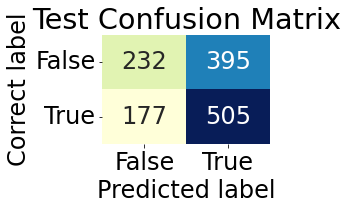

In [18]:
models.test_scores(model_name = "mnb", 
                   verbose_results = False, 
                   all_metrics = False)

In [30]:
models = Binary_Classification(x = df_united.statement, 
                               y = df_united[["veracity"]], 
                               scoring = "accuracy", 
                               test_size = 0.3, 
                               n_folds = 3, 
                               standardize = False,
                               nlp = True,
                               vectorizer = CountVectorizer(lowercase = False))
                     
models.compare()

*** log_reg ***
CV ACCURACY SCORE: 0.58
CV PARAMS:  {'C': 0.1}

*** mnb ***
CV ACCURACY SCORE: 0.58
CV PARAMS:  {'alpha': 10}

*** ran_for ***
CV ACCURACY SCORE: 0.56
CV PARAMS:  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 30}



CV ACCURACY SCORE: 0.58
CV PARAMS:  {'C': 0.1}

Accuracy on test data: 0.58

Classification Report on test data:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59       966
           1       0.57      0.59      0.58       904

    accuracy                           0.58      1870
   macro avg       0.58      0.58      0.58      1870
weighted avg       0.58      0.58      0.58      1870



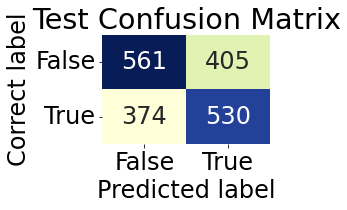

In [31]:
models.test_scores(model_name = "log_reg", 
                   verbose_results = False, 
                   all_metrics = False)

In [96]:
df_united_2 = pd.concat([df_political,df_small])

In [97]:
df_united_2["light_normalization"] = df_united_2.statement.apply(lambda x : normalize(x, 
                                                                  remove_html = True, 
                                                                  lowercase = True,
                                                                  remove_extra_newlines = True,
                                                                  remove_accented_char = True))

In [36]:
models = Binary_Classification(x = df_united_2.light_normalization, 
                               y = df_united_2[["veracity"]], 
                               scoring = "accuracy", 
                               test_size = 0.3, 
                               n_folds = 3, 
                               standardize = False,
                               nlp = True,
                               vectorizer = CountVectorizer(lowercase = False))
                     
models.compare()

*** log_reg ***
CV ACCURACY SCORE: 0.59
CV PARAMS:  {'C': 0.1}

*** mnb ***
CV ACCURACY SCORE: 0.61
CV PARAMS:  {'alpha': 1}

*** ran_for ***
CV ACCURACY SCORE: 0.6
CV PARAMS:  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 30}



CV ACCURACY SCORE: 0.59
CV PARAMS:  {'C': 0.1}

Accuracy on test data: 0.64

Classification Report on test data:
               precision    recall  f1-score   support

           0       0.64      0.67      0.66       354
           1       0.63      0.60      0.62       332

    accuracy                           0.64       686
   macro avg       0.64      0.64      0.64       686
weighted avg       0.64      0.64      0.64       686



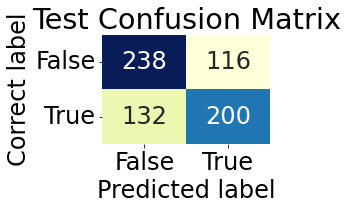

In [37]:
models.test_scores(model_name = "log_reg", 
                   verbose_results = False, 
                   all_metrics = False)

In [40]:
df_united_3 = pd.concat([df_political,df_7t])

In [41]:
df_united_3["light_normalization"] = df_united_3.statement.apply(lambda x : normalize(x, 
                                                                  remove_html = True, 
                                                                  lowercase = True,
                                                                  remove_extra_newlines = True,
                                                                  remove_accented_char = True))

In [44]:
models = Binary_Classification(x = df_united_3.light_normalization, 
                               y = df_united_3[["veracity"]], 
                               scoring = "accuracy", 
                               test_size = 0.3, 
                               n_folds = 3, 
                               standardize = False,
                               nlp = True,
                               vectorizer = CountVectorizer(lowercase = False))
                     
models.compare()

*** log_reg ***
CV ACCURACY SCORE: 0.57
CV PARAMS:  {'C': 0.1}

*** mnb ***
CV ACCURACY SCORE: 0.58
CV PARAMS:  {'alpha': 1}

*** ran_for ***
CV ACCURACY SCORE: 0.56
CV PARAMS:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 30}



CV ACCURACY SCORE: 0.57
CV PARAMS:  {'C': 0.1}

Accuracy on test data: 0.58

Classification Report on test data:
               precision    recall  f1-score   support

           0       0.61      0.56      0.58       952
           1       0.56      0.61      0.58       881

    accuracy                           0.58      1833
   macro avg       0.58      0.58      0.58      1833
weighted avg       0.58      0.58      0.58      1833



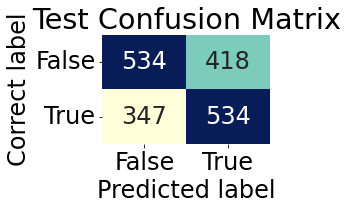

In [45]:
models.test_scores(model_name = "log_reg", 
                   verbose_results = False, 
                   all_metrics = False)

## Sticking with the initial version of the dataset 

In [5]:
train=df_united_2.sample(frac=0.7,random_state=200) #random state is a seed value
test = df_united_2.drop(train.index)

NameError: name 'df_united_2' is not defined

In [101]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 510 to 8460
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   veracity             1600 non-null   int64 
 1   statement            1600 non-null   object
 2   light_normalization  1600 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 68 to 107
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   veracity             671 non-null    int64 
 1   statement            671 non-null    object
 2   light_normalization  671 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [102]:
vectorizer = CountVectorizer(lowercase = False)

In [103]:
x_train = vectorizer.fit_transform(train.light_normalization)

In [104]:
y_train = train.veracity

In [105]:
model = LogisticRegression()


In [106]:
model.fit(x_train, y_train)

LogisticRegression()

In [107]:
test_sample = vectorizer.transform(["It is not me boos"])
test_sample

<1x5212 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [108]:
model.predict(test_sample)

array([0], dtype=int64)

## see how well the model predicts 

In [ ]:
y_pred = model.predict(x_test)

In [86]:
y_test = test.veracity

In [94]:
x_test = np.array(list_test)
x_test = x_test.reshape(1, -1)

In [ ]:
y_score = model.decision_function(x_test)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    Y_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")

ERROR! Session/line number was not unique in database. History logging moved to new session 87


## Extracting the model

In [110]:
 df_united_2

,veracity,statement,light_normalization
3,0,"""Tim Kaine doesn’t want a border at all. He wants to get rid of Immigration and Customs Enforcement and basically the border patrol as well.""","""tim kaine doesnt want a border at all. he wants to get rid of immigration and customs enforcement and basically the border patrol as well."""
5,0,"""The deficit ... is coming down, and it’s coming down rapidly.""","""the deficit ... is coming down, and its coming down rapidly."""
20,1,"""Migrant mother and ‘crying girl’ on Time cover never separated.""","""migrant mother and crying girl on time cover never separated."""
23,0,"""Fact: Over 90,000 kids were detained under Obama. And no one cared.""","""fact: over 90,000 kids were detained under obama. and no one cared."""
24,0,"""$1 billion—that’s how much Bruce Rauner has wasted with his budget crisis.""","""$1 billionthats how much bruce rauner has wasted with his budget crisis."""
...,...,...,...
116,1,"Mmm initially ... I've never been on Twitter, I don't even know what it looks like. I just have heard about it through other people, reading about it in magazines ... Um... In 2009 somebody started a false Twitter account in my name and began tweeting, pretending they were me. So, I had that shu...","mmm initially ... i've never been on twitter, i don't even know what it looks like. i just have heard about it through other people, reading about it in magazines ... um... in 2009 somebody started a false twitter account in my name and began tweeting, pretending they were me. so, i had that shu..."
117,1,"I was born in Durango, Colorado. My mother was a single mother. I have two older sisters, Karen Berry and Dory Gardner. I have one older brother. I was um quite a bit younger than all of them so I primarily grew up by myself. Um I lived back and forth in Texas and New Mexico until I was about 6 ...","i was born in durango, colorado. my mother was a single mother. i have two older sisters, karen berry and dory gardner. i have one older brother. i was um quite a bit younger than all of them so i primarily grew up by myself. um i lived back and forth in texas and new mexico until i was about 6 ..."
118,1,"Um whenever I was little, um my oldest nephew is um two years younger than I am so he and I were always very close. And so whenever I was really little i spent a lot of time with her and then whenever, um I was a freshman in high school I went and lived with her.","um whenever i was little, um my oldest nephew is um two years younger than i am so he and i were always very close. and so whenever i was really little i spent a lot of time with her and then whenever, um i was a freshman in high school i went and lived with her."
119,1,"We were married for two years, and um, we divorced when she was about 10 months old. And basically, we were just too young and didn't know what marriage was supposed to be about. And so, you know, just, I knew that I wanted to go to school. He was very jealous. Um, he really didn't want me to wo...","we were married for two years, and um, we divorced when she was about 10 months old. and basically, we were just too young and didn't know what marriage was supposed to be about. and so, you know, just, i knew that i wanted to go to school. he was very jealous. um, he really didn't want me to wo..."


In [111]:
vectorizer = CountVectorizer(lowercase = False)

In [112]:
X = vectorizer.fit_transform( df_united_2.light_normalization)

In [113]:
y = df_united_2.iloc[:, 0]

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [115]:
model = LogisticRegression(C=0.2, penalty='l2')
model.fit(X_train, y_train)

LogisticRegression(C=0.2)

In [116]:
y_pred = model.predict(X_test)


In [117]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)

In [118]:
score

0.6501457725947521

In [85]:
#Create pickle file using serialization
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [119]:
data = {
  "statement_normalized": "Iowa’s jobs numbers for now but will be recalculated"
}
final_data = [data['statement_normalized']]
print(final_data)
vect_data = vectorizer.transform(final_data)
print(vect_data)

['Iowa’s jobs numbers for now but will be recalculated']
  (0, 770)	1
  (0, 1013)	1
  (0, 2425)	1
  (0, 3202)	1
  (0, 3998)	1
  (0, 4006)	1
  (0, 6332)	1


In [121]:
prediction = model.predict(vect_data)

In [122]:
print(prediction)

[0]


In [136]:
model = MultinomialNB(alpha=1)
model.fit(X_train, y_train)

MultinomialNB(alpha=1)

In [137]:
y_pred = model.predict(X_test)

a = model.predict(["i am just a poor boy"])
a

In [138]:
score = accuracy_score(y_test, y_pred)

In [139]:
score

0.6909620991253644

In [146]:
data = {
  "statement_normalized": "The official pride flag was altered to include Ukrainian colors."
}
final_data = [data['statement_normalized']]
print(final_data)
vect_data = vectorizer.transform(final_data)
print(vect_data)

['The official pride flag was altered to include Ukrainian colors.']
  (0, 2386)	1
  (0, 2990)	1
  (0, 4058)	1
  (0, 5857)	1
  (0, 6236)	1


In [147]:
prediction = model.predict(vect_data)
print(prediction)

[0]


In [148]:
#Create pickle file using serialization
import pickle
pickle_out = open("classifier_final.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [149]:
#Create pickle file using serialization
import pickle
pickle_out = open("vectorizer_final.pkl", "wb")
pickle.dump(vectorizer, pickle_out)
pickle_out.close()